Importing and Understanding Data
---------------

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Importing all datasets
churn_data = pd.read_csv('telecom_churn_data.csv')
churn_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


Step-1 Data Preparation
--------------

### a) Filtering high value customer

In [4]:
churn_data['total_rech_amt_6'].dtypes

dtype('int64')

In [5]:
churn_data['total_rech_amt_7'].dtypes

dtype('int64')

In [6]:
churn_data['total_rech_amt_6'].isnull().sum()

0

In [7]:
churn_data['total_rech_amt_7'].isnull().sum()

0

In [8]:
churn_data['avg_rech_6_7_month'] = (churn_data['total_rech_amt_6'] + churn_data['total_rech_amt_7']) / 2

In [9]:
churn_data[['total_rech_amt_6', 'total_rech_amt_7', 'avg_rech_6_7_month']].head()

,total_rech_amt_6,total_rech_amt_7,avg_rech_6_7_month
0,362,252,307.0
1,74,384,229.0
2,168,315,241.5
3,230,310,270.0
4,196,350,273.0


In [10]:
churn_data[['avg_rech_6_7_month']].describe(percentiles=[.25, .5, .7])

,avg_rech_6_7_month
count,99999.000000
mean,325.238792
std,370.833466
min,0.000000
25%,115.000000
50%,229.000000
70%,368.500000
max,37762.500000


In [11]:
seventeeth_per_value = churn_data['avg_rech_6_7_month'].quantile(0.7)

In [12]:
churn_data_hv_cust = churn_data[churn_data['avg_rech_6_7_month'] >= seventeeth_per_value]

In [13]:
churn_data_hv_cust.shape

(30011, 227)

##  thus we are left with only high value customers

In [14]:
churn_data_hv_cust.shape[0] / churn_data.shape[0]

0.3001130011300113

## b) Cleaning data by removing unnecssary columns

In [15]:
churn_data_hv_cust.drop(['mobile_number','circle_id'], axis=1, inplace=True)

In [16]:
# find all the date columns
date_columns = churn_data_hv_cust.columns[churn_data_hv_cust.columns.str.contains('date')]

In [17]:
# convert the date columns into a uniform date format.
for column in date_columns:
    churn_data_hv_cust[column] = pd.to_datetime(churn_data_hv_cust[column], errors='coerce')

In [18]:
churn_data_hv_cust[date_columns].head()

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9
7,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-06-27,2014-07-25,2014-08-26,2014-09-30,NaT,NaT,NaT,NaT
8,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-06-25,2014-07-31,2014-08-30,2014-09-30,NaT,2014-07-31,2014-08-23,NaT
13,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-06-20,2014-07-22,2014-08-30,2014-09-26,NaT,NaT,2014-08-30,NaT
16,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-06-30,2014-07-31,2014-08-14,2014-09-10,NaT,NaT,NaT,NaT
17,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-06-30,2014-07-30,2014-08-25,2014-09-29,NaT,NaT,NaT,NaT


In [19]:
# remove last_date_of_month_6, last_date_of_month_7, last_date_of_month_8, last_date_of_month_9 as they 
## have mostly repeated values and are of no significance to the analysis

In [20]:

churn_data_hv_cust.drop(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9'], axis=1, inplace=True)

In [21]:
## unique values or columns having just one value is of not much signinificance

In [22]:
unique_val_cols = churn_data_hv_cust.nunique()
unique_val_cols = unique_val_cols[unique_val_cols.values == 1]
print(unique_val_cols)

loc_og_t2o_mou      1
std_og_t2o_mou      1
loc_ic_t2o_mou      1
std_og_t2c_mou_6    1
std_og_t2c_mou_7    1
std_og_t2c_mou_8    1
std_og_t2c_mou_9    1
std_ic_t2o_mou_6    1
std_ic_t2o_mou_7    1
std_ic_t2o_mou_8    1
std_ic_t2o_mou_9    1
dtype: int64


In [23]:
# lets drop all the columns with only one unique value
churn_data_hv_cust.drop(list(unique_val_cols.index), axis=1, inplace=True)

In [24]:
## so we are left with
churn_data_hv_cust.shape

(30011, 210)

## c) inputting NA with Median for outgoing usage cols

In [25]:
sixth_month_cols = churn_data_hv_cust.columns[churn_data_hv_cust.columns.str.contains('_6') == True]
churn_data_hv_cust[list(sixth_month_cols)].head()

,arpu_6,onnet_mou_6,offnet_mou_6,roam_ic_mou_6,roam_og_mou_6,loc_og_t2t_mou_6,loc_og_t2m_mou_6,loc_og_t2f_mou_6,loc_og_t2c_mou_6,loc_og_mou_6,...,vol_3g_mb_6,arpu_3g_6,arpu_2g_6,night_pck_user_6,monthly_2g_6,sachet_2g_6,monthly_3g_6,sachet_3g_6,fb_user_6,avg_rech_6_7_month
7,1069.180,57.84,453.43,16.23,23.74,51.39,308.63,62.13,0.0,422.16,...,0.0,NaN,NaN,NaN,0,0,0,0,NaN,1185.0
8,378.721,413.69,94.66,0.00,0.00,297.13,80.96,0.00,0.0,378.09,...,0.0,NaN,NaN,NaN,0,0,0,0,NaN,519.0
13,492.846,501.76,413.31,23.53,7.98,49.63,151.13,4.54,0.0,205.31,...,0.0,NaN,NaN,NaN,0,0,0,0,NaN,380.0
16,430.975,50.51,296.29,0.00,0.00,42.61,273.29,0.00,0.0,315.91,...,0.0,NaN,NaN,NaN,0,0,0,0,NaN,459.0
17,690.008,1185.91,61.64,0.00,0.00,38.99,58.54,0.00,0.0,97.54,...,0.0,NaN,NaN,NaN,0,0,0,0,NaN,408.0


In [26]:
sixth_month_og_mou_cols = churn_data_hv_cust.columns[(churn_data_hv_cust.columns.str.contains('_6') == True) & (churn_data_hv_cust.columns.str.contains('_mou_') == True) & (churn_data_hv_cust.columns.str.contains('_og_') == True)]
churn_data_hv_cust[list(sixth_month_og_mou_cols)].head()

,roam_og_mou_6,loc_og_t2t_mou_6,loc_og_t2m_mou_6,loc_og_t2f_mou_6,loc_og_t2c_mou_6,loc_og_mou_6,std_og_t2t_mou_6,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_mou_6,isd_og_mou_6,spl_og_mou_6,total_og_mou_6
7,23.74,51.39,308.63,62.13,0.0,422.16,4.30,49.89,6.66,60.86,0.0,4.50,487.53
8,0.00,297.13,80.96,0.00,0.0,378.09,116.56,13.69,0.00,130.26,0.0,0.00,508.36
13,7.98,49.63,151.13,4.54,0.0,205.31,446.41,255.36,0.00,701.78,0.0,0.00,907.09
16,0.00,42.61,273.29,0.00,0.0,315.91,7.89,22.99,0.00,30.89,0.0,0.00,346.81
17,0.00,38.99,58.54,0.00,0.0,97.54,1146.91,1.55,0.00,1148.46,0.0,2.58,1249.53


In [27]:
sixth_month_og_mou_df = churn_data_hv_cust[list(sixth_month_og_mou_cols)]

In [28]:
sixth_month_og_mou_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30011 entries, 7 to 99997
Data columns (total 13 columns):
roam_og_mou_6       29695 non-null float64
loc_og_t2t_mou_6    29695 non-null float64
loc_og_t2m_mou_6    29695 non-null float64
loc_og_t2f_mou_6    29695 non-null float64
loc_og_t2c_mou_6    29695 non-null float64
loc_og_mou_6        29695 non-null float64
std_og_t2t_mou_6    29695 non-null float64
std_og_t2m_mou_6    29695 non-null float64
std_og_t2f_mou_6    29695 non-null float64
std_og_mou_6        29695 non-null float64
isd_og_mou_6        29695 non-null float64
spl_og_mou_6        29695 non-null float64
total_og_mou_6      30011 non-null float64
dtypes: float64(13)
memory usage: 3.2 MB


In [29]:
sixth_month_og_mou_df[sixth_month_og_mou_df['total_og_mou_6'] == 0].head()

,roam_og_mou_6,loc_og_t2t_mou_6,loc_og_t2m_mou_6,loc_og_t2f_mou_6,loc_og_t2c_mou_6,loc_og_mou_6,std_og_t2t_mou_6,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_mou_6,isd_og_mou_6,spl_og_mou_6,total_og_mou_6
33,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
146,1.31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
171,194.66,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
191,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
sixth_month_og_mou_df[sixth_month_og_mou_df['total_og_mou_6'] == 0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1057 entries, 33 to 99997
Data columns (total 13 columns):
roam_og_mou_6       741 non-null float64
loc_og_t2t_mou_6    741 non-null float64
loc_og_t2m_mou_6    741 non-null float64
loc_og_t2f_mou_6    741 non-null float64
loc_og_t2c_mou_6    741 non-null float64
loc_og_mou_6        741 non-null float64
std_og_t2t_mou_6    741 non-null float64
std_og_t2m_mou_6    741 non-null float64
std_og_t2f_mou_6    741 non-null float64
std_og_mou_6        741 non-null float64
isd_og_mou_6        741 non-null float64
spl_og_mou_6        741 non-null float64
total_og_mou_6      1057 non-null float64
dtypes: float64(13)
memory usage: 115.6 KB


In [31]:
sixth_month_og_mou_df.median(axis=0)

roam_og_mou_6         0.00
loc_og_t2t_mou_6     33.33
loc_og_t2m_mou_6    103.51
loc_og_t2f_mou_6      0.38
loc_og_t2c_mou_6      0.00
loc_og_mou_6        169.53
std_og_t2t_mou_6     13.63
std_og_t2m_mou_6     39.39
std_og_t2f_mou_6      0.00
std_og_mou_6        131.06
isd_og_mou_6          0.00
spl_og_mou_6          0.26
total_og_mou_6      510.23
dtype: float64

In [32]:
# lets fill the na entries with the median for all the mou columns across 6,7,8,9 months

mou_cols = churn_data_hv_cust.columns[(churn_data_hv_cust.columns.str.contains('_mou_') == True) & (churn_data_hv_cust.columns.str.contains('_og_') == True)]
mou_cols

Index(['roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'roam_og_mou_9',
       'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
       'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7',
       'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_6',
       'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2f_mou_9',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'loc_og_t2c_mou_9', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8',
       'loc_og_mou_9', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7',
       'std_og_t2t_mou_8', 'std_og_t2t_mou_9', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2m_mou_9',
       'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8',
       'std_og_t2f_mou_9', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8',
       'std_og_mou_9', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8',
       'isd_og_mou_9', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8',
       'spl_og_mou_9', 'total_og_m

In [33]:
for col in mou_cols:
    median = churn_data_hv_cust[col].median()    
    churn_data_hv_cust[col] = churn_data_hv_cust[col].fillna(median)

In [34]:
churn_data_hv_cust[mou_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30011 entries, 7 to 99997
Data columns (total 52 columns):
roam_og_mou_6       30011 non-null float64
roam_og_mou_7       30011 non-null float64
roam_og_mou_8       30011 non-null float64
roam_og_mou_9       30011 non-null float64
loc_og_t2t_mou_6    30011 non-null float64
loc_og_t2t_mou_7    30011 non-null float64
loc_og_t2t_mou_8    30011 non-null float64
loc_og_t2t_mou_9    30011 non-null float64
loc_og_t2m_mou_6    30011 non-null float64
loc_og_t2m_mou_7    30011 non-null float64
loc_og_t2m_mou_8    30011 non-null float64
loc_og_t2m_mou_9    30011 non-null float64
loc_og_t2f_mou_6    30011 non-null float64
loc_og_t2f_mou_7    30011 non-null float64
loc_og_t2f_mou_8    30011 non-null float64
loc_og_t2f_mou_9    30011 non-null float64
loc_og_t2c_mou_6    30011 non-null float64
loc_og_t2c_mou_7    30011 non-null float64
loc_og_t2c_mou_8    30011 non-null float64
loc_og_t2c_mou_9    30011 non-null float64
loc_og_mou_6        30011 non-n

## d) inputting NA with Median for incoming usage cols

In [35]:
# Lets do tha same thing for incoming columns

ic_cols = churn_data_hv_cust.columns[(churn_data_hv_cust.columns.str.contains('_mou_') == True) & (churn_data_hv_cust.columns.str.contains('_ic_') == True)]

for col in ic_cols:
    median = churn_data_hv_cust[col].median()    
    churn_data_hv_cust[col] = churn_data_hv_cust[col].fillna(median)
    
churn_data_hv_cust[ic_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30011 entries, 7 to 99997
Data columns (total 48 columns):
roam_ic_mou_6       30011 non-null float64
roam_ic_mou_7       30011 non-null float64
roam_ic_mou_8       30011 non-null float64
roam_ic_mou_9       30011 non-null float64
loc_ic_t2t_mou_6    30011 non-null float64
loc_ic_t2t_mou_7    30011 non-null float64
loc_ic_t2t_mou_8    30011 non-null float64
loc_ic_t2t_mou_9    30011 non-null float64
loc_ic_t2m_mou_6    30011 non-null float64
loc_ic_t2m_mou_7    30011 non-null float64
loc_ic_t2m_mou_8    30011 non-null float64
loc_ic_t2m_mou_9    30011 non-null float64
loc_ic_t2f_mou_6    30011 non-null float64
loc_ic_t2f_mou_7    30011 non-null float64
loc_ic_t2f_mou_8    30011 non-null float64
loc_ic_t2f_mou_9    30011 non-null float64
loc_ic_mou_6        30011 non-null float64
loc_ic_mou_7        30011 non-null float64
loc_ic_mou_8        30011 non-null float64
loc_ic_mou_9        30011 non-null float64
std_ic_t2t_mou_6    30011 non-n

In [36]:
# lets analyse the data columns

sixth_month_data_cols = churn_data_hv_cust.columns[(churn_data_hv_cust.columns.str.contains('_6') == True) & ((churn_data_hv_cust.columns.str.contains('_data_') == True) | (churn_data_hv_cust.columns.str.contains('_2g_') == True) | (churn_data_hv_cust.columns.str.contains('_3g_') == True) | (churn_data_hv_cust.columns.str.contains('fb_user_') == True))]

sixth_month_data_cols_df = churn_data_hv_cust[list(sixth_month_data_cols)]

In [37]:
sixth_month_data_cols_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30011 entries, 7 to 99997
Data columns (total 15 columns):
date_of_last_rech_data_6    11397 non-null datetime64[ns]
total_rech_data_6           11397 non-null float64
max_rech_data_6             11397 non-null float64
count_rech_2g_6             11397 non-null float64
count_rech_3g_6             11397 non-null float64
av_rech_amt_data_6          11397 non-null float64
vol_2g_mb_6                 30011 non-null float64
vol_3g_mb_6                 30011 non-null float64
arpu_3g_6                   11397 non-null float64
arpu_2g_6                   11397 non-null float64
monthly_2g_6                30011 non-null int64
sachet_2g_6                 30011 non-null int64
monthly_3g_6                30011 non-null int64
sachet_3g_6                 30011 non-null int64
fb_user_6                   11397 non-null float64
dtypes: datetime64[ns](1), float64(10), int64(4)
memory usage: 3.7 MB


In [38]:
sixth_month_data_cols_df.head()

,date_of_last_rech_data_6,total_rech_data_6,max_rech_data_6,count_rech_2g_6,count_rech_3g_6,av_rech_amt_data_6,vol_2g_mb_6,vol_3g_mb_6,arpu_3g_6,arpu_2g_6,monthly_2g_6,sachet_2g_6,monthly_3g_6,sachet_3g_6,fb_user_6
7,NaT,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0,0,0,0,NaN
8,NaT,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0,0,0,0,NaN
13,NaT,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0,0,0,0,NaN
16,NaT,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0,0,0,0,NaN
17,NaT,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0,0,0,0,NaN


In [39]:

sixth_month_data_cols_df.loc[sixth_month_data_cols_df['date_of_last_rech_data_6'].isnull(),:].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18614 entries, 7 to 99988
Data columns (total 15 columns):
date_of_last_rech_data_6    0 non-null datetime64[ns]
total_rech_data_6           0 non-null float64
max_rech_data_6             0 non-null float64
count_rech_2g_6             0 non-null float64
count_rech_3g_6             0 non-null float64
av_rech_amt_data_6          0 non-null float64
vol_2g_mb_6                 18614 non-null float64
vol_3g_mb_6                 18614 non-null float64
arpu_3g_6                   0 non-null float64
arpu_2g_6                   0 non-null float64
monthly_2g_6                18614 non-null int64
sachet_2g_6                 18614 non-null int64
monthly_3g_6                18614 non-null int64
sachet_3g_6                 18614 non-null int64
fb_user_6                   0 non-null float64
dtypes: datetime64[ns](1), float64(10), int64(4)
memory usage: 2.3 MB


# it can be seen that if the last recharge date is not available, then the corresponding data columns are empty, it can be implied that they havent recharged 

In [40]:
data_cols = churn_data_hv_cust.columns[(churn_data_hv_cust.columns.str.contains('_data_') == True) | (churn_data_hv_cust.columns.str.contains('_2g_') == True) | (churn_data_hv_cust.columns.str.contains('_3g_') == True) | (churn_data_hv_cust.columns.str.contains('fb_user_') == True) | (churn_data_hv_cust.columns.str.contains('night_pck_user') == True) ]
data_cols_lis = list(data_cols)
data_cols_lis.remove('date_of_last_rech_data_6')
data_cols_lis.remove('date_of_last_rech_data_7')
data_cols_lis.remove('date_of_last_rech_data_8')
data_cols_lis.remove('date_of_last_rech_data_9')

In [41]:
#  lets impute 0 for all the na values in data columns

for col in data_cols_lis:    
    churn_data_hv_cust[col] = churn_data_hv_cust[col].fillna(0)
    
churn_data_hv_cust[data_cols_lis].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30011 entries, 7 to 99997
Data columns (total 60 columns):
total_rech_data_6     30011 non-null float64
total_rech_data_7     30011 non-null float64
total_rech_data_8     30011 non-null float64
total_rech_data_9     30011 non-null float64
max_rech_data_6       30011 non-null float64
max_rech_data_7       30011 non-null float64
max_rech_data_8       30011 non-null float64
max_rech_data_9       30011 non-null float64
count_rech_2g_6       30011 non-null float64
count_rech_2g_7       30011 non-null float64
count_rech_2g_8       30011 non-null float64
count_rech_2g_9       30011 non-null float64
count_rech_3g_6       30011 non-null float64
count_rech_3g_7       30011 non-null float64
count_rech_3g_8       30011 non-null float64
count_rech_3g_9       30011 non-null float64
av_rech_amt_data_6    30011 non-null float64
av_rech_amt_data_7    30011 non-null float64
av_rech_amt_data_8    30011 non-null float64
av_rech_amt_data_9    30011 non-null

## e) Fixing data type for cols

In [42]:
# columns 'night_pck_user_', 'max_rech_data_' count_rech_2g_','count_rech_3g_','total_rech_data_','fb_user_' have integer values but are or 
# float types. so let's convert them to integers
def ConvertToIntFor(month):
    int_cols = ['night_pck_user_', 'max_rech_data_','count_rech_2g_','count_rech_3g_','total_rech_data_','fb_user_']
    for col in int_cols:
        churn_data_hv_cust[col+month] = churn_data_hv_cust[col+month].astype('int64')

In [43]:
ConvertToIntFor('6')
ConvertToIntFor('7')
ConvertToIntFor('8')
ConvertToIntFor('9')

## f) Now we have fixed most of cols but lets input remaining NA's with median

In [44]:
sixth_month_cols = churn_data_hv_cust.columns[churn_data_hv_cust.columns.str.contains('_6') == True]

In [45]:
churn_data_hv_cust.isnull().sum().sort_values(ascending=False)

date_of_last_rech_data_6    18614
date_of_last_rech_data_9    18550
date_of_last_rech_data_7    18349
date_of_last_rech_data_8    18257
onnet_mou_9                  1704
og_others_9                  1704
offnet_mou_9                 1704
ic_others_9                  1704
onnet_mou_8                   938
offnet_mou_8                  938
og_others_8                   938
ic_others_8                   938
date_of_last_rech_9           866
date_of_last_rech_8           594
og_others_6                   316
onnet_mou_6                   316
ic_others_6                   316
offnet_mou_6                  316
onnet_mou_7                   303
ic_others_7                   303
og_others_7                   303
offnet_mou_7                  303
date_of_last_rech_7           114
date_of_last_rech_6            62
total_og_mou_7                  0
total_og_mou_9                  0
loc_ic_t2t_mou_6                0
loc_ic_t2t_mou_7                0
total_og_mou_8                  0
total_og_mou_6

In [46]:
# lets impute the median for 'offnet_mou_9', 'ic_others_9',   'onnet_mou_8',   'offnet_mou_8',  'og_others_8',  'ic_others_8',       'og_others_6',          'onnet_mou_6',         'ic_others_6',          'offnet_mou_6',         'onnet_mou_7',          'ic_others_7',         'og_others_7',          'offnet_mou_7' 
rem_cols = ['onnet_mou_9', 'og_others_9', 'offnet_mou_9', 'ic_others_9',   'onnet_mou_8',   'offnet_mou_8',  'og_others_8',  'ic_others_8',       'og_others_6',          'onnet_mou_6',         'ic_others_6',          'offnet_mou_6',         'onnet_mou_7',          'ic_others_7',         'og_others_7',          'offnet_mou_7' ]
for col in rem_cols:
    med = churn_data_hv_cust[col].median()
    churn_data_hv_cust[col] = churn_data_hv_cust[col].fillna(median)
    
churn_data_hv_cust.isnull().sum().sort_values(ascending=False)

date_of_last_rech_data_6    18614
date_of_last_rech_data_9    18550
date_of_last_rech_data_7    18349
date_of_last_rech_data_8    18257
date_of_last_rech_9           866
date_of_last_rech_8           594
date_of_last_rech_7           114
date_of_last_rech_6            62
og_others_7                     0
total_og_mou_9                  0
total_og_mou_8                  0
total_og_mou_7                  0
total_og_mou_6                  0
og_others_9                     0
og_others_8                     0
avg_rech_6_7_month              0
std_og_mou_8                    0
og_others_6                     0
spl_og_mou_9                    0
spl_og_mou_8                    0
spl_og_mou_7                    0
spl_og_mou_6                    0
isd_og_mou_9                    0
isd_og_mou_8                    0
isd_og_mou_7                    0
isd_og_mou_6                    0
loc_ic_t2t_mou_6                0
loc_ic_t2t_mou_7                0
loc_ic_t2t_mou_8                0
loc_ic_t2t_mou

# Step-2 Analyzing data , adding new columns and tagging data with churn values

In [47]:
churn_data_hv_cust.select_dtypes(include=['int64']).columns

Index(['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_num_9', 'total_rech_amt_6', 'total_rech_amt_7',
       'total_rech_amt_8', 'total_rech_amt_9', 'max_rech_amt_6',
       'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_amt_9',
       'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8',
       'last_day_rch_amt_9', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6',
       'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
       'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
       'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7',
       'count_rech_3g_8', 'count_rech_3g_9', 'night_pck_user_6',
       'night_pck_user_7', 'night_pck_user_8', 'night_pck_user_9',
       'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'monthly_2g_9',
       'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'sachet_2g_9',
       'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'monthly_3g

## a) derriving new cols

In [48]:
churn_data_hv_cust['has_recharged_06'] = churn_data_hv_cust['total_rech_amt_6']
churn_data_hv_cust.loc[churn_data_hv_cust['has_recharged_06'] > 0, 'has_recharged_06'] = 1
churn_data_hv_cust['has_recharged_07'] = churn_data_hv_cust['total_rech_amt_7']
churn_data_hv_cust.loc[churn_data_hv_cust['has_recharged_07'] > 0, 'has_recharged_07'] = 1
churn_data_hv_cust['has_recharged_08'] = churn_data_hv_cust['total_rech_amt_8']
churn_data_hv_cust.loc[churn_data_hv_cust['has_recharged_08'] > 0, 'has_recharged_08'] = 1
churn_data_hv_cust['has_recharged_09'] = churn_data_hv_cust['total_rech_amt_9']
churn_data_hv_cust.loc[churn_data_hv_cust['has_recharged_09'] > 0, 'has_recharged_09'] = 1

In [49]:
churn_data_hv_cust['has_recharged_data_06'] = churn_data_hv_cust['total_rech_data_6']
churn_data_hv_cust.loc[churn_data_hv_cust['has_recharged_data_06'] > 0, 'has_recharged_data_06'] = 1
churn_data_hv_cust['has_recharged_data_07'] = churn_data_hv_cust['total_rech_data_7']
churn_data_hv_cust.loc[churn_data_hv_cust['has_recharged_data_07'] > 0, 'has_recharged_data_07'] = 1
churn_data_hv_cust['has_recharged_data_08'] = churn_data_hv_cust['total_rech_data_8']
churn_data_hv_cust.loc[churn_data_hv_cust['has_recharged_data_08'] > 0, 'has_recharged_data_08'] = 1
churn_data_hv_cust['has_recharged_data_09'] = churn_data_hv_cust['total_rech_data_9']
churn_data_hv_cust.loc[churn_data_hv_cust['has_recharged_data_09'] > 0, 'has_recharged_data_09'] = 1

In [50]:
churn_data_hv_cust['is_positive_revenue_06'] = churn_data_hv_cust['arpu_6']
churn_data_hv_cust.loc[churn_data_hv_cust['is_positive_revenue_06'] > 0, 'is_positive_revenue_06'] = 1
churn_data_hv_cust.loc[churn_data_hv_cust['is_positive_revenue_06'] <= 0, 'is_positive_revenue_06'] = 0
churn_data_hv_cust['is_positive_revenue_07'] = churn_data_hv_cust['arpu_7']
churn_data_hv_cust.loc[churn_data_hv_cust['is_positive_revenue_07'] > 0, 'is_positive_revenue_07'] = 1
churn_data_hv_cust.loc[churn_data_hv_cust['is_positive_revenue_07'] <= 0, 'is_positive_revenue_07'] = 0
churn_data_hv_cust['is_positive_revenue_08'] = churn_data_hv_cust['arpu_8']
churn_data_hv_cust.loc[churn_data_hv_cust['is_positive_revenue_08'] > 0, 'is_positive_revenue_08'] = 1
churn_data_hv_cust.loc[churn_data_hv_cust['is_positive_revenue_08'] <= 0, 'is_positive_revenue_08'] = 0
churn_data_hv_cust['is_positive_revenue_09'] = churn_data_hv_cust['arpu_9']
churn_data_hv_cust.loc[churn_data_hv_cust['is_positive_revenue_09'] > 0, 'is_positive_revenue_09'] = 1
churn_data_hv_cust.loc[churn_data_hv_cust['is_positive_revenue_09'] <= 0, 'is_positive_revenue_09'] = 0

In [51]:
churn_data_hv_cust['is_positive_2g_revenue_06'] = churn_data_hv_cust['arpu_2g_6']
churn_data_hv_cust.loc[churn_data_hv_cust['is_positive_2g_revenue_06'] > 0, 'is_positive_2g_revenue_06'] = 1
churn_data_hv_cust.loc[churn_data_hv_cust['is_positive_2g_revenue_06'] <= 0, 'is_positive_2g_revenue_06'] = 0
churn_data_hv_cust['is_positive_2g_revenue_07'] = churn_data_hv_cust['arpu_2g_7']
churn_data_hv_cust.loc[churn_data_hv_cust['is_positive_2g_revenue_07'] > 0, 'is_positive_2g_revenue_07'] = 1
churn_data_hv_cust.loc[churn_data_hv_cust['is_positive_2g_revenue_07'] <= 0, 'is_positive_2g_revenue_07'] = 0
churn_data_hv_cust['is_positive_2g_revenue_08'] = churn_data_hv_cust['arpu_2g_8']
churn_data_hv_cust.loc[churn_data_hv_cust['is_positive_2g_revenue_08'] > 0, 'is_positive_2g_revenue_08'] = 1
churn_data_hv_cust.loc[churn_data_hv_cust['is_positive_2g_revenue_08'] <= 0, 'is_positive_2g_revenue_08'] = 0
churn_data_hv_cust['is_positive_2g_revenue_09'] = churn_data_hv_cust['arpu_2g_9']
churn_data_hv_cust.loc[churn_data_hv_cust['is_positive_2g_revenue_09'] > 0, 'is_positive_2g_revenue_09'] = 1
churn_data_hv_cust.loc[churn_data_hv_cust['is_positive_2g_revenue_09'] <= 0, 'is_positive_2g_revenue_09'] = 0
churn_data_hv_cust['is_positive_3g_revenue_06'] = churn_data_hv_cust['arpu_3g_6']
churn_data_hv_cust.loc[churn_data_hv_cust['is_positive_3g_revenue_06'] > 0, 'is_positive_3g_revenue_06'] = 1
churn_data_hv_cust.loc[churn_data_hv_cust['is_positive_3g_revenue_06'] <= 0, 'is_positive_3g_revenue_06'] = 0
churn_data_hv_cust['is_positive_3g_revenue_07'] = churn_data_hv_cust['arpu_3g_7']
churn_data_hv_cust.loc[churn_data_hv_cust['is_positive_3g_revenue_07'] > 0, 'is_positive_3g_revenue_07'] = 1
churn_data_hv_cust.loc[churn_data_hv_cust['is_positive_3g_revenue_07'] <= 0, 'is_positive_3g_revenue_07'] = 0
churn_data_hv_cust['is_positive_3g_revenue_08'] = churn_data_hv_cust['arpu_3g_8']
churn_data_hv_cust.loc[churn_data_hv_cust['is_positive_3g_revenue_08'] > 0, 'is_positive_3g_revenue_08'] = 1
churn_data_hv_cust.loc[churn_data_hv_cust['is_positive_3g_revenue_08'] <= 0, 'is_positive_3g_revenue_08'] = 0
churn_data_hv_cust['is_positive_3g_revenue_09'] = churn_data_hv_cust['arpu_3g_9']
churn_data_hv_cust.loc[churn_data_hv_cust['is_positive_3g_revenue_09'] > 0, 'is_positive_3g_revenue_09'] = 1
churn_data_hv_cust.loc[churn_data_hv_cust['is_positive_3g_revenue_09'] <= 0, 'is_positive_3g_revenue_09'] = 0

In [52]:
churn_data_hv_cust['is_positive_revenue_06'] = churn_data_hv_cust['is_positive_revenue_06'].astype('int64')
churn_data_hv_cust['is_positive_revenue_07'] = churn_data_hv_cust['is_positive_revenue_07'].astype('int64')
churn_data_hv_cust['is_positive_revenue_08'] = churn_data_hv_cust['is_positive_revenue_08'].astype('int64')
churn_data_hv_cust['is_positive_revenue_09'] = churn_data_hv_cust['is_positive_revenue_09'].astype('int64')
churn_data_hv_cust['is_positive_2g_revenue_06'] = churn_data_hv_cust['is_positive_2g_revenue_06'].astype('int64')
churn_data_hv_cust['is_positive_2g_revenue_07'] = churn_data_hv_cust['is_positive_2g_revenue_07'].astype('int64')
churn_data_hv_cust['is_positive_2g_revenue_08'] = churn_data_hv_cust['is_positive_2g_revenue_08'].astype('int64')
churn_data_hv_cust['is_positive_2g_revenue_09'] = churn_data_hv_cust['is_positive_2g_revenue_09'].astype('int64')
churn_data_hv_cust['is_positive_3g_revenue_06'] = churn_data_hv_cust['is_positive_3g_revenue_06'].astype('int64')
churn_data_hv_cust['is_positive_3g_revenue_07'] = churn_data_hv_cust['is_positive_3g_revenue_07'].astype('int64')
churn_data_hv_cust['is_positive_3g_revenue_08'] = churn_data_hv_cust['is_positive_3g_revenue_08'].astype('int64')
churn_data_hv_cust['is_positive_3g_revenue_09'] = churn_data_hv_cust['is_positive_3g_revenue_09'].astype('int64')

## b) Removing outliers as needed my most of algorithms

In [53]:
churn_data_hv_cust[['total_rech_amt_6','total_rech_amt_7', 'total_rech_amt_8', 'total_rech_amt_9']].describe(percentiles=[.25, .5, .75, .995])

,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9
count,30011.000000,30011.000000,30011.000000,30011.000000
mean,697.365833,695.962880,613.638799,568.094465
std,539.325984,562.143146,601.821630,584.162348
min,0.000000,0.000000,0.000000,0.000000
25%,432.000000,426.500000,309.000000,260.000000
50%,584.000000,581.000000,520.000000,481.000000
75%,837.000000,835.000000,790.000000,750.000000
99.5%,3025.700000,2948.350000,2851.600000,2813.900000
max,35190.000000,40335.000000,45320.000000,37235.000000


In [54]:
# certainly there are outlier which can be removed

q = churn_data_hv_cust['total_rech_amt_6'].quantile(0.995)
churn_data_hv_cust = churn_data_hv_cust[churn_data_hv_cust['total_rech_amt_6'] < q]
q = churn_data_hv_cust['total_rech_amt_7'].quantile(0.995)
churn_data_hv_cust = churn_data_hv_cust[churn_data_hv_cust['total_rech_amt_7'] < q]
q = churn_data_hv_cust['total_rech_amt_9'].quantile(0.995)
churn_data_hv_cust = churn_data_hv_cust[churn_data_hv_cust['total_rech_amt_9'] < q]
q = churn_data_hv_cust['total_rech_amt_8'].quantile(0.995)
churn_data_hv_cust = churn_data_hv_cust[churn_data_hv_cust['total_rech_amt_8'] < q]
churn_data_hv_cust.shape

(29413, 230)

### not much of a data loss and the outliers are also gone

In [55]:
def recharge_category(n,y):
    if n <= 300:
        return 'rec_low_' + y
    elif n > 300 and n <=500:
        return 'rec_med_'+y
    elif n > 500 and n <=800:
        return 'rec_high_'+y
    else:
        return 'rec_very_high_'+y

In [56]:
churn_data_hv_cust['cust_rec_cat_6'] = churn_data_hv_cust['total_rech_amt_6'].apply(lambda x: recharge_category(x,'06'))
churn_data_hv_cust['cust_rec_cat_7'] = churn_data_hv_cust['total_rech_amt_7'].apply(lambda x: recharge_category(x,'07'))
churn_data_hv_cust['cust_rec_cat_8'] = churn_data_hv_cust['total_rech_amt_8'].apply(lambda x: recharge_category(x,'08'))
churn_data_hv_cust['cust_rec_cat_9'] = churn_data_hv_cust['total_rech_amt_9'].apply(lambda x: recharge_category(x,'09'))

In [57]:
cont = pd.get_dummies(churn_data_hv_cust['cust_rec_cat_6'], drop_first=True)
churn_data_hv_cust = pd.concat([churn_data_hv_cust,cont],axis=1)
cont = pd.get_dummies(churn_data_hv_cust['cust_rec_cat_7'], drop_first=True)
churn_data_hv_cust = pd.concat([churn_data_hv_cust,cont],axis=1)
cont = pd.get_dummies(churn_data_hv_cust['cust_rec_cat_8'], drop_first=True)
churn_data_hv_cust = pd.concat([churn_data_hv_cust,cont],axis=1)
cont = pd.get_dummies(churn_data_hv_cust['cust_rec_cat_9'], drop_first=True)
churn_data_hv_cust = pd.concat([churn_data_hv_cust,cont],axis=1)
churn_data_hv_cust.drop(['cust_rec_cat_6','cust_rec_cat_7','cust_rec_cat_8','cust_rec_cat_9'], axis=1, inplace=True)

In [58]:
churn_data_hv_cust.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,...,rec_very_high_06,rec_low_07,rec_med_07,rec_very_high_07,rec_low_08,rec_med_08,rec_very_high_08,rec_low_09,rec_med_09,rec_very_high_09
8,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.63,...,0,0,0,0,1,0,0,1,0,0
13,492.846,205.671,593.260,322.732,501.76,108.39,534.24,244.81,413.31,119.28,...,0,1,0,0,0,0,0,0,1,0
16,430.975,299.869,187.894,206.490,50.51,74.01,70.61,31.34,296.29,229.74,...,0,0,1,0,1,0,0,1,0,0
17,690.008,18.980,25.499,257.583,1185.91,9.28,7.79,558.51,61.64,0.00,...,1,1,0,0,1,0,0,0,1,0
21,514.453,597.753,637.760,578.596,102.41,132.11,85.14,161.63,757.93,896.68,...,0,0,0,0,0,0,0,0,0,0


In [59]:
churn_data_hv_cust[['total_og_mou_6','total_og_mou_7', 'total_og_mou_8', 'total_og_mou_9']].describe(percentiles=[.25, .5, .75, .995])

,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9
count,29413.000000,29413.000000,29413.000000,29413.000000
mean,672.848131,691.881675,602.135743,542.372844
std,620.713141,636.711596,618.785812,595.430499
min,0.000000,0.000000,0.000000,0.000000
25%,265.740000,273.880000,186.710000,134.590000
50%,507.710000,521.260000,429.330000,378.460000
75%,888.390000,918.530000,819.440000,743.440000
99.5%,3591.391000,3648.243200,3490.272400,3329.761200
max,6226.580000,8224.160000,10882.860000,9234.090000


In [60]:
q = churn_data_hv_cust['total_og_mou_8'].quantile(0.995)
churn_data_hv_cust = churn_data_hv_cust[churn_data_hv_cust['total_og_mou_8'] < q]
q = churn_data_hv_cust['total_og_mou_9'].quantile(0.995)
churn_data_hv_cust = churn_data_hv_cust[churn_data_hv_cust['total_og_mou_9'] < q]
q = churn_data_hv_cust['total_og_mou_6'].quantile(0.995)
churn_data_hv_cust = churn_data_hv_cust[churn_data_hv_cust['total_og_mou_6'] < q]

In [61]:
churn_data_hv_cust.shape

(28972, 242)

In [62]:
def tot_outgoing_category(n,x):
    if n <= 250:
        return 'tot_og_low_'+x
    elif n > 250 and n <=500:
        return 'tot_og_med_'+x
    elif n > 500 and n <=1000:
        return 'tot_og_high_'+x
    else:
        return 'tot_og_very_high_'+x

In [63]:
churn_data_hv_cust['tot_outgoing_cat_6'] = churn_data_hv_cust['total_og_mou_6'].apply(lambda x: tot_outgoing_category(x,'06'))
churn_data_hv_cust['tot_outgoing_cat_7'] = churn_data_hv_cust['total_og_mou_7'].apply(lambda x: tot_outgoing_category(x,'07'))
churn_data_hv_cust['tot_outgoing_cat_8'] = churn_data_hv_cust['total_og_mou_8'].apply(lambda x: tot_outgoing_category(x,'08'))
churn_data_hv_cust['tot_outgoing_cat_9'] = churn_data_hv_cust['total_og_mou_9'].apply(lambda x: tot_outgoing_category(x,'09'))

In [64]:
cont = pd.get_dummies(churn_data_hv_cust['tot_outgoing_cat_6'], drop_first=True)
churn_data_hv_cust = pd.concat([churn_data_hv_cust,cont],axis=1)
cont = pd.get_dummies(churn_data_hv_cust['tot_outgoing_cat_7'], drop_first=True)
churn_data_hv_cust = pd.concat([churn_data_hv_cust,cont],axis=1)
cont = pd.get_dummies(churn_data_hv_cust['tot_outgoing_cat_8'], drop_first=True)
churn_data_hv_cust = pd.concat([churn_data_hv_cust,cont],axis=1)
cont = pd.get_dummies(churn_data_hv_cust['tot_outgoing_cat_9'], drop_first=True)
churn_data_hv_cust = pd.concat([churn_data_hv_cust,cont],axis=1)
churn_data_hv_cust.drop(['tot_outgoing_cat_6','tot_outgoing_cat_7','tot_outgoing_cat_8','tot_outgoing_cat_9'], axis=1, inplace=True)

In [65]:
churn_data_hv_cust.shape

(28972, 254)

In [66]:
churn_data_hv_cust[['total_ic_mou_6','total_ic_mou_7', 'total_ic_mou_8', 'total_ic_mou_9']].describe(percentiles=[.25, .5, .75, .9])

,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9
count,28972.000000,28972.000000,28972.000000,28972.000000
mean,304.678789,310.990349,290.920041,272.285961
std,357.726580,362.403101,351.979822,342.508610
min,0.000000,0.000000,0.000000,0.000000
25%,90.120000,98.570000,78.555000,63.310000
50%,204.520000,209.845000,191.485000,174.385000
75%,390.065000,392.402500,375.865000,357.067500
90%,672.488000,676.139000,653.039000,627.789000
max,6798.640000,7279.080000,5990.710000,6382.130000


In [67]:
def tot_ic_category(n,x):
    if n <= 100:
        return 'tot_ic_low_'+x
    elif n > 100 and n <=200:
        return 'tot_ic_med_'+x
    elif n > 200 and n <=500:
        return 'tot_ic_high_'+x
    else:
        return 'tot_ic_very_high_'+x

In [68]:
churn_data_hv_cust['tot_ic_cat_6'] = churn_data_hv_cust['total_ic_mou_6'].apply(lambda x: tot_ic_category(x,'06'))
churn_data_hv_cust['tot_ic_cat_7'] = churn_data_hv_cust['total_ic_mou_7'].apply(lambda x: tot_ic_category(x,'07'))
churn_data_hv_cust['tot_ic_cat_8'] = churn_data_hv_cust['total_ic_mou_8'].apply(lambda x: tot_ic_category(x,'08'))
churn_data_hv_cust['tot_ic_cat_9'] = churn_data_hv_cust['total_ic_mou_9'].apply(lambda x: tot_ic_category(x,'09'))

In [69]:
cont = pd.get_dummies(churn_data_hv_cust['tot_ic_cat_6'], drop_first=True)
churn_data_hv_cust = pd.concat([churn_data_hv_cust,cont],axis=1)
cont = pd.get_dummies(churn_data_hv_cust['tot_ic_cat_7'], drop_first=True)
churn_data_hv_cust = pd.concat([churn_data_hv_cust,cont],axis=1)
cont = pd.get_dummies(churn_data_hv_cust['tot_ic_cat_8'], drop_first=True)
churn_data_hv_cust = pd.concat([churn_data_hv_cust,cont],axis=1)
cont = pd.get_dummies(churn_data_hv_cust['tot_ic_cat_9'], drop_first=True)
churn_data_hv_cust = pd.concat([churn_data_hv_cust,cont],axis=1)
churn_data_hv_cust.drop(['tot_ic_cat_6','tot_ic_cat_7','tot_ic_cat_8','tot_ic_cat_9'], axis=1, inplace=True)

In [70]:
churn_data_hv_cust[['vol_2g_mb_6','vol_2g_mb_7', 'vol_2g_mb_8', 'vol_2g_mb_9']].describe(percentiles=[.25, .5, .75, .9, .99])

,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9
count,28972.000000,28972.000000,28972.000000,28972.000000
mean,79.121947,78.430451,69.290050,62.307255
std,276.944954,281.489331,269.312893,244.177101
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,14.500000,14.950000,9.435000,6.052500
90%,200.946000,196.163000,154.199000,132.807000
99%,1322.072500,1346.691300,1255.575900,1107.195100
max,10285.900000,7873.550000,11117.610000,8993.950000


In [71]:
q = churn_data_hv_cust['vol_2g_mb_8'].quantile(0.999)
churn_data_hv_cust = churn_data_hv_cust[churn_data_hv_cust['vol_2g_mb_8'] < q]
q = churn_data_hv_cust['vol_2g_mb_6'].quantile(0.99)
churn_data_hv_cust = churn_data_hv_cust[churn_data_hv_cust['vol_2g_mb_6'] < q]
churn_data_hv_cust.shape

(28653, 266)

In [72]:
def tot_vol_2g_category(n,x):
    if n <= 10:
        return 'tot_vol_2g_low_'+x
    elif n > 10 and n <=75:
        return 'tot_vol_2g_med_'+x
    elif n > 75 and n <=150:
        return 'tot_vol_2g_high_'+x
    else:
        return 'tot_vol_2g_very_high_'+x

In [73]:
churn_data_hv_cust['tot_vol_2g_cat_6'] = churn_data_hv_cust['vol_2g_mb_6'].apply(lambda x: tot_ic_category(x,'06'))
churn_data_hv_cust['tot_vol_2g_cat_7'] = churn_data_hv_cust['vol_2g_mb_7'].apply(lambda x: tot_ic_category(x,'07'))
churn_data_hv_cust['tot_vol_2g_cat_8'] = churn_data_hv_cust['vol_2g_mb_8'].apply(lambda x: tot_ic_category(x,'08'))
churn_data_hv_cust['tot_vol_2g_cat_9'] = churn_data_hv_cust['vol_2g_mb_9'].apply(lambda x: tot_ic_category(x,'09'))

## c) Handling categorical variables

In [74]:
cont = pd.get_dummies(churn_data_hv_cust['tot_vol_2g_cat_6'], drop_first=True)
churn_data_hv_cust = pd.concat([churn_data_hv_cust,cont],axis=1)
cont = pd.get_dummies(churn_data_hv_cust['tot_vol_2g_cat_7'], drop_first=True)
churn_data_hv_cust = pd.concat([churn_data_hv_cust,cont],axis=1)
cont = pd.get_dummies(churn_data_hv_cust['tot_vol_2g_cat_8'], drop_first=True)
churn_data_hv_cust = pd.concat([churn_data_hv_cust,cont],axis=1)
cont = pd.get_dummies(churn_data_hv_cust['tot_vol_2g_cat_9'], drop_first=True)
churn_data_hv_cust = pd.concat([churn_data_hv_cust,cont],axis=1)
churn_data_hv_cust.drop(['tot_vol_2g_cat_6','tot_vol_2g_cat_7','tot_vol_2g_cat_8','tot_vol_2g_cat_9'], axis=1, inplace=True)

In [75]:
churn_data_hv_cust.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,...,tot_ic_very_high_06,tot_ic_low_07,tot_ic_med_07,tot_ic_very_high_07,tot_ic_low_08,tot_ic_med_08,tot_ic_very_high_08,tot_ic_low_09,tot_ic_med_09,tot_ic_very_high_09
8,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.63,...,0,0,0,0,1,0,0,1,0,0
13,492.846,205.671,593.260,322.732,501.76,108.39,534.24,244.81,413.31,119.28,...,0,1,0,0,1,0,0,1,0,0
16,430.975,299.869,187.894,206.490,50.51,74.01,70.61,31.34,296.29,229.74,...,0,1,0,0,1,0,0,1,0,0
17,690.008,18.980,25.499,257.583,1185.91,9.28,7.79,558.51,61.64,0.00,...,0,1,0,0,1,0,0,1,0,0
21,514.453,597.753,637.760,578.596,102.41,132.11,85.14,161.63,757.93,896.68,...,0,1,0,0,1,0,0,1,0,0


In [76]:
churn_data_hv_cust[['vol_3g_mb_6','vol_3g_mb_7', 'vol_3g_mb_8', 'vol_3g_mb_9']].describe(percentiles=[.25, .5, .75, .9, .995])

,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9
count,28653.000000,28653.000000,28653.000000,28653.000000
mean,243.454357,260.240914,247.422775,249.859942
std,742.693372,747.134498,736.398793,762.212461
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.230000,0.000000,0.000000
90%,860.128000,932.012000,881.660000,871.564000
99.5%,4341.794800,4690.322000,4443.415600,4623.913200
max,21493.370000,22613.100000,29651.830000,26857.040000


In [77]:
q = churn_data_hv_cust['vol_3g_mb_9'].quantile(0.995)
churn_data_hv_cust = churn_data_hv_cust[churn_data_hv_cust['vol_3g_mb_9'] < q]
q = churn_data_hv_cust['vol_3g_mb_6'].quantile(0.995)
churn_data_hv_cust = churn_data_hv_cust[churn_data_hv_cust['vol_3g_mb_6'] < q]
churn_data_hv_cust.shape

(28366, 278)

In [78]:
def tot_vol_3g_category(n,x):
    if n <= 500:
        return 'tot_vol_3g_low_'+x
    elif n > 500 and n <=750:
        return 'tot_vol_3g_med_'+x
    elif n > 750 and n <=1000:
        return 'tot_vol_3g_high_'+x
    else:
        return 'tot_vol_3g_very_high_'+x

In [79]:
churn_data_hv_cust['tot_vol_3g_cat_6'] = churn_data_hv_cust['vol_3g_mb_6'].apply(lambda x: tot_ic_category(x,'06'))
churn_data_hv_cust['tot_vol_3g_cat_7'] = churn_data_hv_cust['vol_3g_mb_7'].apply(lambda x: tot_ic_category(x,'07'))
churn_data_hv_cust['tot_vol_3g_cat_8'] = churn_data_hv_cust['vol_3g_mb_8'].apply(lambda x: tot_ic_category(x,'08'))
churn_data_hv_cust['tot_vol_3g_cat_9'] = churn_data_hv_cust['vol_3g_mb_9'].apply(lambda x: tot_ic_category(x,'09'))

In [80]:
cont = pd.get_dummies(churn_data_hv_cust['tot_vol_3g_cat_6'], drop_first=True)
churn_data_hv_cust = pd.concat([churn_data_hv_cust,cont],axis=1)
cont = pd.get_dummies(churn_data_hv_cust['tot_vol_3g_cat_7'], drop_first=True)
churn_data_hv_cust = pd.concat([churn_data_hv_cust,cont],axis=1)
cont = pd.get_dummies(churn_data_hv_cust['tot_vol_3g_cat_8'], drop_first=True)
churn_data_hv_cust = pd.concat([churn_data_hv_cust,cont],axis=1)
cont = pd.get_dummies(churn_data_hv_cust['tot_vol_3g_cat_9'], drop_first=True)
churn_data_hv_cust = pd.concat([churn_data_hv_cust,cont],axis=1)
churn_data_hv_cust.drop(['tot_vol_3g_cat_6','tot_vol_3g_cat_7','tot_vol_3g_cat_8','tot_vol_3g_cat_9'], axis=1, inplace=True)

## d) Tagging churn customers

In [81]:
def churn(n):
    if (n > 0.0):
        return 0
    else:
        return 1

In [82]:
churn_data_hv_cust['churn'] = churn_data_hv_cust['total_ic_mou_9'].apply(lambda x: churn(x)) & churn_data_hv_cust['total_og_mou_9'].apply(lambda x: churn(x)) & churn_data_hv_cust['vol_2g_mb_9'].apply(lambda x: churn(x)) & churn_data_hv_cust['vol_3g_mb_9'].apply(lambda x: churn(x))

In [83]:
churn_data_hv_cust[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9', 'vol_3g_mb_9','churn']].head()

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9,churn
8,34.91,142.18,0.0,0.0,0
13,631.86,446.09,0.0,0.0,0
16,334.56,255.74,0.0,0.0,0
17,87.13,631.08,0.0,0.0,0
21,252.61,1031.53,0.0,0.0,0


In [84]:
churn_data_hv_cust['churn'].value_counts()

0    25909
1     2457
Name: churn, dtype: int64

## e) Removing 9th month cols as they cannot be used while training

In [85]:
ninth_month_cols = churn_data_hv_cust.columns[(churn_data_hv_cust.columns.str.contains('_9') == True) | churn_data_hv_cust.columns.str.contains('_09') == True]

In [86]:
churn_data_hv_cust.drop(list(ninth_month_cols), axis=1, inplace=True)

In [87]:
churn_data_hv_cust.shape

(28366, 220)

In [88]:
churn_data_hv_cust.drop(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_data_6','date_of_last_rech_data_7', 'date_of_last_rech_data_8'], axis=1, inplace=True)

In [89]:
churn_data_hv_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28366 entries, 8 to 99997
Columns: 214 entries, arpu_6 to churn
dtypes: float64(110), int64(59), uint8(45)
memory usage: 38.0 MB


## f) normalizing data

In [90]:
float_lis = list(churn_data_hv_cust.select_dtypes(include=['float64']).columns)

In [91]:
int_lis = ['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_num_9', 'total_rech_amt_6', 'total_rech_amt_7',
       'total_rech_amt_8', 'total_rech_amt_9', 'max_rech_amt_6',
       'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_amt_9',
       'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8',
       'last_day_rch_amt_9', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6',
       'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
       'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
       'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7',
       'count_rech_3g_8', 'count_rech_3g_9', 'night_pck_user_6',
       'night_pck_user_7', 'night_pck_user_8', 'night_pck_user_9',
       'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'monthly_2g_9',
       'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'sachet_2g_9',
       'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'monthly_3g_9',
       'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'sachet_3g_9', 'fb_user_6',
       'fb_user_7', 'fb_user_8', 'fb_user_9', 'aon']

In [92]:
standard_lis = float_lis + int_lis

In [93]:
non_ninth_mon_cols = [x for x in standard_lis if '_9' not in x]

In [94]:
df = churn_data_hv_cust[non_ninth_mon_cols]
normalized_df=(df-df.mean())/df.std()

In [95]:
normalized_df.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon
8,-0.583840,-0.196224,-1.120096,0.342422,0.159727,-0.559797,-0.758200,-0.780468,-0.561724,-0.219473,...,-0.312114,-0.309116,-0.303583,-0.160633,-0.15797,-0.152062,-0.697729,1.413777,1.474783,-0.979321
13,-0.194801,-1.181023,0.322890,0.566869,-0.433747,0.767567,0.040720,-0.686372,0.352603,0.088884,...,-0.312114,-0.309116,-0.303583,-0.160633,-0.15797,-0.152062,-0.697729,-0.707300,1.474783,1.358710
16,-0.405712,-0.857291,-0.960154,-0.583147,-0.517837,-0.465316,-0.252673,-0.417451,-0.492273,-0.219473,...,-0.312114,-0.309116,-0.303583,-0.160633,-0.15797,-0.152062,-0.697729,-0.707300,-0.678042,-0.779385
17,0.477300,-1.822628,-1.474159,2.310433,-0.676160,-0.632366,-0.840988,-0.976767,-0.907761,-0.219473,...,-0.312114,-0.309116,-0.303583,-0.160633,-0.15797,-0.152062,-0.697729,-0.707300,-0.678042,-0.620252
21,-0.121146,0.166453,0.463740,-0.450879,-0.375730,-0.426678,0.904752,1.206255,1.676418,-0.219473,...,-0.312114,-0.309116,-0.303583,-0.160633,-0.15797,-0.152062,-0.697729,-0.707300,-0.678042,-0.566187


In [96]:
churn_data_hv_cust = churn_data_hv_cust.drop(non_ninth_mon_cols, axis=1)
churn_data_hv_cust = pd.concat([churn_data_hv_cust,normalized_df],axis=1)
churn_data_hv_cust.head()

,has_recharged_06,has_recharged_07,has_recharged_08,has_recharged_data_06,has_recharged_data_07,has_recharged_data_08,is_positive_revenue_06,is_positive_revenue_07,is_positive_revenue_08,is_positive_2g_revenue_06,...,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon
8,1,1,1,0,1,1,1,1,1,0,...,-0.312114,-0.309116,-0.303583,-0.160633,-0.15797,-0.152062,-0.697729,1.413777,1.474783,-0.979321
13,1,1,1,0,0,1,1,1,1,0,...,-0.312114,-0.309116,-0.303583,-0.160633,-0.15797,-0.152062,-0.697729,-0.707300,1.474783,1.358710
16,1,1,1,0,0,0,1,1,1,0,...,-0.312114,-0.309116,-0.303583,-0.160633,-0.15797,-0.152062,-0.697729,-0.707300,-0.678042,-0.779385
17,1,0,1,0,0,0,1,1,1,0,...,-0.312114,-0.309116,-0.303583,-0.160633,-0.15797,-0.152062,-0.697729,-0.707300,-0.678042,-0.620252
21,1,1,1,0,0,0,1,1,1,0,...,-0.312114,-0.309116,-0.303583,-0.160633,-0.15797,-0.152062,-0.697729,-0.707300,-0.678042,-0.566187


## g) Analyzing churn

Text(0.5,1,'Churn Distribution')

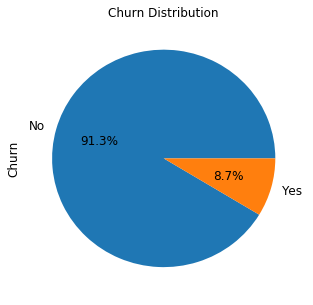

In [97]:
#Churn Distribution
ax = (churn_data_hv_cust['churn'].value_counts()*100.0 /len(churn_data_hv_cust)).plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )                                                                           

ax.set_ylabel('Churn',fontsize = 12)
ax.set_title('Churn Distribution', fontsize = 12)

In [98]:
cust_who_did_churn = churn_data_hv_cust[churn_data_hv_cust['churn'] == 1]
cust_who_did_churn.shape

(2457, 214)

In [99]:
## Lets do undersampling as we dont have a way to do oversampling
cust_who_did_churn1 = cust_who_did_churn.append(cust_who_did_churn)
cust_who_did_churn = cust_who_did_churn1.append(cust_who_did_churn)
cust_who_did_churn.shape

(7371, 214)

In [100]:
cust_who_didnt_churn = churn_data_hv_cust[churn_data_hv_cust['churn'] == 0]
cust_who_didnt_churn.shape

(25909, 214)

In [101]:
churn_data_hv_cust = cust_who_didnt_churn.append(cust_who_did_churn)
churn_data_hv_cust.shape

(33280, 214)

Text(0.5,1,'Churn Distribution')

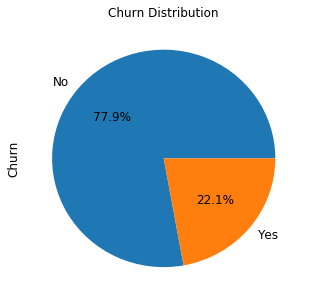

In [102]:
#Churn Distribution
ax = (churn_data_hv_cust['churn'].value_counts()*100.0 /len(churn_data_hv_cust)).plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )                                                                           

ax.set_ylabel('Churn',fontsize = 12)
ax.set_title('Churn Distribution', fontsize = 12)

## we oversampled yes values or churned case to remove imbalance

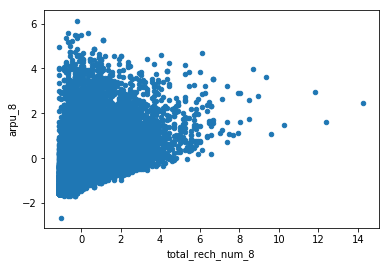

In [103]:
churn_data_hv_cust[['total_rech_num_8', 'arpu_8']].plot.scatter(x = 'total_rech_num_8',
                                                              y='arpu_8')

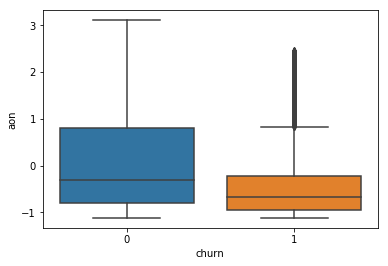

In [104]:
sns.boxplot(x = churn_data_hv_cust.churn, y = churn_data_hv_cust.aon)

Text(0.5,1,'Distribution of Max Recharge Amount by churn')

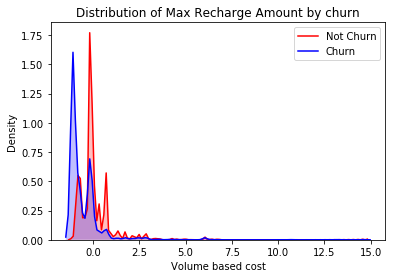

In [105]:
ax = sns.kdeplot(churn_data_hv_cust.max_rech_amt_8[(churn_data_hv_cust["churn"] == 0)],
                color="Red", shade = True)
ax = sns.kdeplot(churn_data_hv_cust.max_rech_amt_8[(churn_data_hv_cust["churn"] == 1)],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Volume based cost')
ax.set_title('Distribution of Max Recharge Amount by churn')

# Step-3 Building model 1 for getting best prediction

Splitting Data into Training and Testing Sets
-----------

In [106]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = churn_data_hv_cust.drop(['churn'],axis=1)

# Putting response variable to y
y = churn_data_hv_cust['churn']

y.head()

8     0
13    0
16    0
17    0
21    0
Name: churn, dtype: int64

In [107]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [108]:
X_train.shape

(23296, 213)

PCA
-----

In [109]:
#Importing the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [110]:
#Doing the PCA on the train data
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [111]:
pca.components_

array([[ 7.46638895e-04,  1.92471979e-03,  1.25898261e-02, ...,
         1.65265291e-01,  1.58656206e-01,  3.38881185e-02],
       [ 1.26774221e-03,  4.92139706e-03,  2.20353093e-02, ...,
        -2.79638615e-02, -9.99154862e-03,  4.08826932e-02],
       [ 2.31861398e-04, -4.29520928e-03, -8.03179401e-03, ...,
        -3.68555210e-02, -3.62220649e-02,  8.28054534e-02],
       ...,
       [ 0.00000000e+00, -1.53339091e-16, -1.68298090e-17, ...,
        -1.03406152e-17, -1.09878421e-16, -1.33257599e-17],
       [ 0.00000000e+00,  1.02747146e-16,  2.73059415e-17, ...,
         1.89042490e-17, -9.60698544e-17,  2.13856325e-17],
       [ 0.00000000e+00, -2.48681331e-16,  1.32803061e-17, ...,
         6.22305847e-17, -1.90014863e-16, -9.20870925e-17]])

In [112]:
colnames = list(X_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head()

,PC1,PC2,Feature
0,0.000747,0.001268,has_recharged_06
1,0.001925,0.004921,has_recharged_07
2,0.012590,0.022035,has_recharged_08
3,0.073382,-0.014356,has_recharged_data_06
4,0.074924,-0.009871,has_recharged_data_07


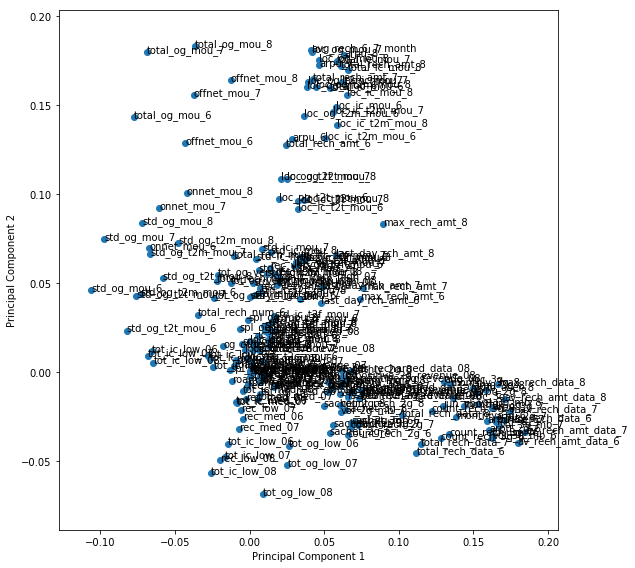

In [113]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

In [114]:
pca.explained_variance_ratio_

array([1.17162551e-01, 7.88791083e-02, 6.34460330e-02, 4.67309602e-02,
       3.79400790e-02, 3.16115300e-02, 3.06427619e-02, 2.88225783e-02,
       2.43232627e-02, 2.23236226e-02, 1.94016350e-02, 1.83840801e-02,
       1.67574135e-02, 1.67154734e-02, 1.64826100e-02, 1.57018000e-02,
       1.54943364e-02, 1.51108915e-02, 1.37551366e-02, 1.32187659e-02,
       1.29607438e-02, 1.18161687e-02, 1.16081876e-02, 1.03340758e-02,
       1.01631838e-02, 9.82920397e-03, 9.61193587e-03, 9.35453844e-03,
       8.71718628e-03, 8.20613595e-03, 7.36033231e-03, 7.03170787e-03,
       6.86128384e-03, 6.68709613e-03, 6.58448116e-03, 6.43993004e-03,
       6.24010990e-03, 5.84114029e-03, 5.54198560e-03, 5.53921757e-03,
       5.37902539e-03, 5.25358347e-03, 5.11255230e-03, 5.09719270e-03,
       4.95579392e-03, 4.76107629e-03, 4.67483834e-03, 4.62187038e-03,
       4.27105181e-03, 4.08280285e-03, 3.93257962e-03, 3.73353499e-03,
       3.66733618e-03, 3.62896120e-03, 3.59389592e-03, 3.49157007e-03,
      

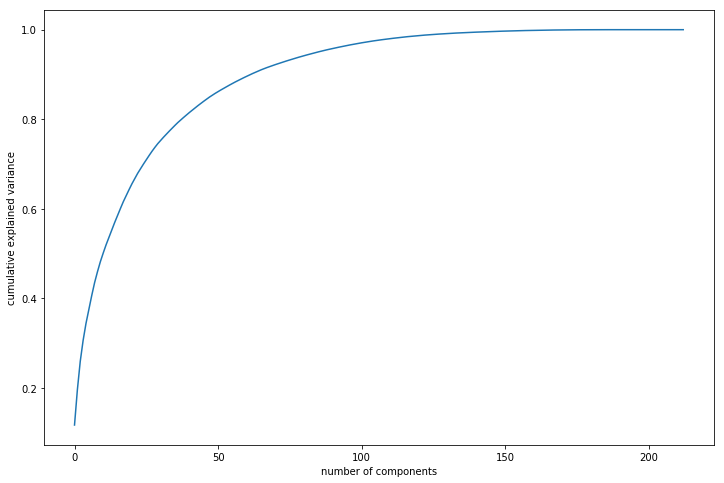

In [115]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [116]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=75)

In [117]:
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(23296, 75)

In [118]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())

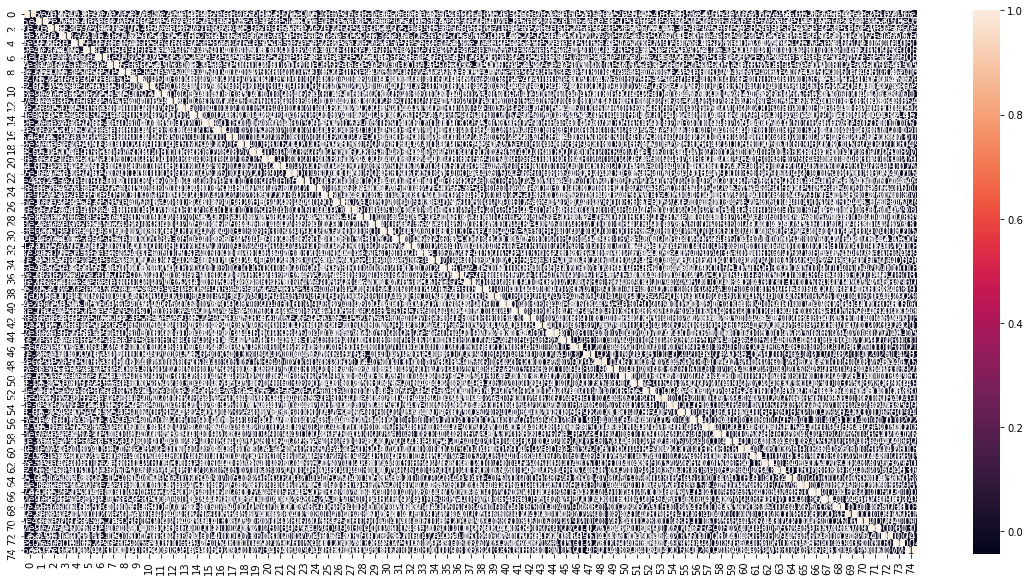

In [119]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [120]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.022543202590140407 , min corr:  -0.043606184887343885


In [121]:
#Applying selected components to the test data - 16 components
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(9984, 75)

## b) Logistic Regression Model

In [122]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

learner_pca = LogisticRegression()
model_pca = learner_pca.fit(df_train_pca,y_train)

In [123]:
#Making prediction on the test data
pred_probs_test = model_pca.predict_proba(df_test_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.89'

In [124]:
pca_again = PCA(0.95)

In [125]:
df_train_pca2 = pca_again.fit_transform(X_train)
df_train_pca2.shape

(23296, 86)

In [126]:
#training the regression model
learner_pca2 = LogisticRegression()
model_pca2 = learner_pca2.fit(df_train_pca2,y_train)

In [127]:
df_test_pca2 = pca_again.transform(X_test)
df_test_pca2.shape

(9984, 86)

In [128]:
#Making prediction on the test data
pred_probs_test2 = model_pca2.predict_proba(df_test_pca2)[:,1]
"{:2.2f}".format(metrics.roc_auc_score(y_test, pred_probs_test2))

'0.89'

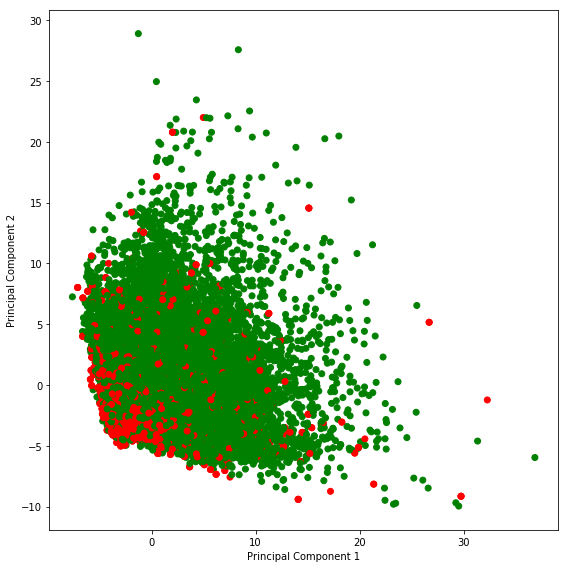

In [129]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(df_train_pca[:,0], df_train_pca[:,1], c = y_train.map({0:'green',1:'red'}))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

## so we are done with Logistic regression got auc score of 0.89.
## going forward we care more about recall as we want to predict churns better

## b) Random Forest

In [130]:
# Random forest - default hyperparameters

In [131]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [132]:
# fit
rfc.fit(df_train_pca2,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [133]:
# Making predictions
predictions = rfc.predict(df_test_pca2)

In [134]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [135]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.97      0.98      0.98      7762
          1       0.92      0.90      0.91      2222

avg / total       0.96      0.96      0.96      9984



In [136]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

[[7598  164]
 [ 222 2000]]


In [137]:
print(accuracy_score(y_test,predictions))


0.9613381410256411


In [138]:
print("recall : ",(1990/(1990+232)))

recall :  0.8955895589558955


In [139]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 2)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="recall")
rf.fit(df_train_pca2, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(2, 20, 2)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='recall', verbose=0)

In [140]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.311880,0.022219,0.006184,0.004107,2,{'max_depth': 2},0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.573708,0.049609,0.008508,0.003633,4,{'max_depth': 4},0.085437,0.142718,0.140777,0.078641,...,0.108563,0.027612,8,0.099296,0.130857,0.176985,0.076960,0.111165,0.119053,0.033822
2,0.722580,0.070950,0.006776,0.000396,6,{'max_depth': 6},0.288350,0.329126,0.309709,0.333010,...,0.319287,0.018010,7,0.302258,0.362467,0.363681,0.375577,0.375971,0.355990,0.027463
3,1.103429,0.164454,0.008179,0.000398,8,{'max_depth': 8},0.553398,0.482524,0.497087,0.495146,...,0.510004,0.025167,6,0.616169,0.588492,0.594319,0.594805,0.617961,0.602349,0.012232
4,1.192086,0.156066,0.009982,0.001544,10,{'max_depth': 10},0.682524,0.640777,0.633010,0.622330,...,0.637014,0.025509,5,0.765963,0.784899,0.768148,0.764263,0.740291,0.764713,0.014265


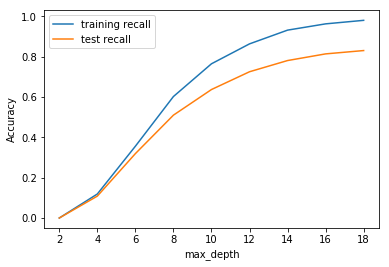

In [141]:
# plotting recalls with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


## You can see that as we increase the value of max_depth, both train and test scores increase till a point, but after that test score starts to decrease. The ensemble tries to overfit as we increase the max_depth.
## Having the max_depth to 14 might be the optimal value

In [142]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(10, 90, 20)}

rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="recall")
rf.fit(df_train_pca2, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': range(10, 90, 20)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

In [143]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.659542,0.058880,0.013173,0.000754,10,{'n_estimators': 10},0.853398,0.834951,0.829126,0.833010,...,0.836667,0.008576,4,0.989561,0.984948,0.983248,0.982034,0.983981,0.984754,0.002585
1,5.094318,0.144078,0.030376,0.002702,30,{'n_estimators': 30},0.877670,0.865049,0.861165,0.849515,...,0.865413,0.009892,3,0.998058,0.998301,0.996844,0.997572,0.997330,0.997621,0.000518
2,8.065059,0.631432,0.046883,0.007135,50,{'n_estimators': 50},0.884466,0.867961,0.873786,0.872816,...,0.875510,0.005595,1,0.999757,0.999514,0.999272,0.999757,0.998786,0.999417,0.000363
3,10.500532,1.078698,0.064635,0.008727,70,{'n_estimators': 70},0.877670,0.867961,0.873786,0.865049,...,0.873180,0.006034,2,1.000000,1.000000,0.999757,0.999757,1.000000,0.999903,0.000119


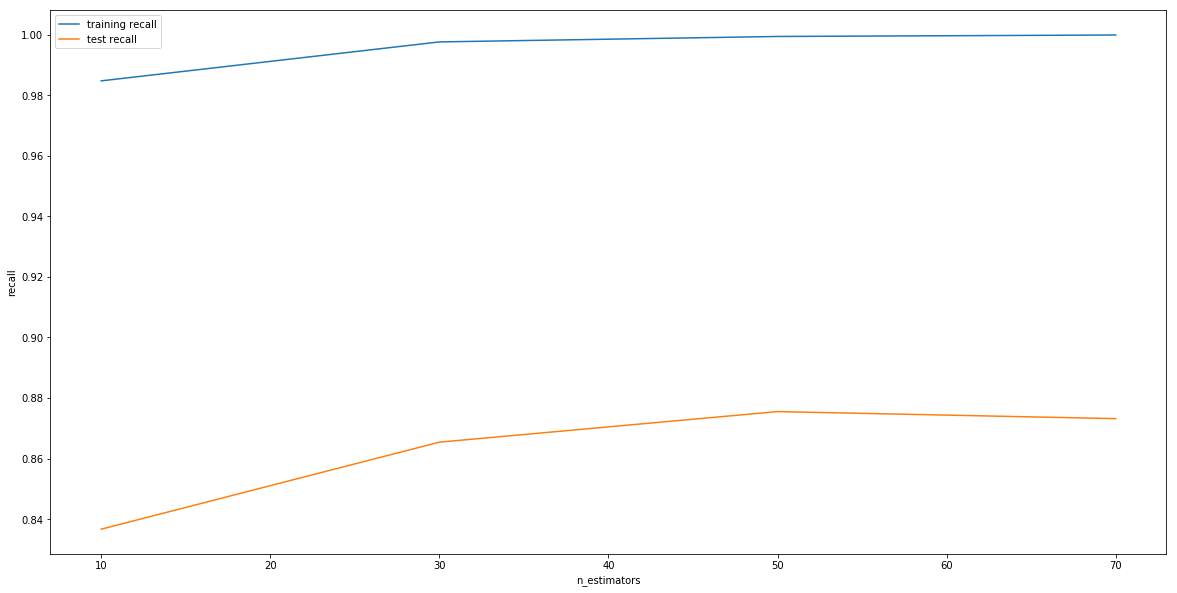

In [144]:
# plotting recall with n_estimators
plt.figure(figsize = (20,10))
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("n_estimators")
plt.ylabel("recall")
plt.legend()
plt.show()

## nestimator = 30

In [145]:
# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [20,50,85]}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="recall")
rf.fit(df_train_pca2, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_features': [20, 50, 85]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='recall', verbose=0)

In [146]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,3.773404,0.071952,0.013179,0.001327,20,{'max_features': 20},0.850485,0.839806,0.857282,0.833010,...,0.843270,0.009187,3,0.987133,0.986404,0.987133,0.985433,0.980825,0.985386,0.002364
1,10.444089,0.312147,0.014367,0.002644,50,{'max_features': 50},0.851456,0.848544,0.861165,0.834951,...,0.850652,0.008991,2,0.987618,0.986890,0.985919,0.982277,0.986650,0.985871,0.001877
2,18.730830,0.493320,0.011976,0.001268,85,{'max_features': 85},0.856311,0.852427,0.861165,0.861165,...,0.858225,0.003404,1,0.985191,0.986890,0.986890,0.987861,0.986408,0.986648,0.000868


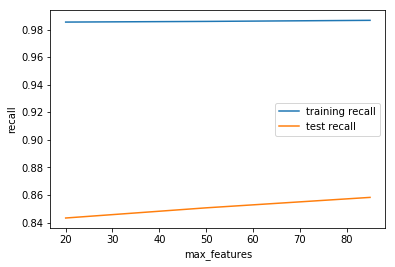

In [147]:
# plotting recall with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("max_features")
plt.ylabel("recall")
plt.legend()
plt.show()

In [148]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(1, 30, 5)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="recall")
rf.fit(df_train_pca2, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_leaf': range(1, 30, 5)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

In [149]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.471618,0.079257,0.010778,0.000740,1,{'min_samples_leaf': 1},0.850485,0.830097,0.838835,0.832039,...,0.838804,0.007379,1,0.987618,0.987133,0.987376,0.987376,0.986165,0.987133,0.000508
1,1.471481,0.131536,0.012572,0.003864,6,{'min_samples_leaf': 6},0.713592,0.685437,0.705825,0.699029,...,0.695666,0.014078,2,0.872056,0.882496,0.869629,0.878369,0.869903,0.874490,0.005094
2,1.461701,0.068940,0.010572,0.001353,11,{'min_samples_leaf': 11},0.637864,0.594175,0.602913,0.628155,...,0.616819,0.016094,3,0.763535,0.776888,0.755038,0.758679,0.780340,0.766896,0.010000
3,1.450481,0.101706,0.012560,0.001020,16,{'min_samples_leaf': 16},0.564078,0.594175,0.559223,0.554369,...,0.566129,0.014357,4,0.676621,0.718621,0.701869,0.693129,0.694903,0.697029,0.013608
4,1.291056,0.078153,0.011562,0.001505,21,{'min_samples_leaf': 21},0.536893,0.515534,0.510680,0.501942,...,0.519521,0.013227,5,0.624909,0.639233,0.631464,0.618111,0.646602,0.632064,0.010089


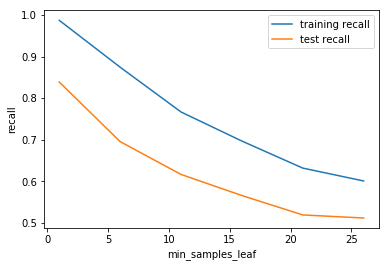

In [150]:
# plotting recall with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("min_samples_leaf")
plt.ylabel("recall")
plt.legend()
plt.show()

In [151]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10,14],
    'min_samples_leaf': range(1, 15, 3),
    'n_estimators': [10,90, 20], 
    'max_features': [50,60, 70,80]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,scoring='recall',
                          cv = 3, n_jobs = -1,verbose = 1)

In [152]:
# Fit the grid search to the data
grid_search.fit(df_train_pca2, y_train)

Fitting 3 folds for each of 240 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 19.6min


KeyboardInterrupt: 

In [ ]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

In [171]:

# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=14,
                             min_samples_leaf=4, 
                             min_samples_split=35,
                             max_features=85,
                             n_estimators=70)

In [172]:
# fit
rfc.fit(df_train_pca2,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=14, max_features=85, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=35,
            min_weight_fraction_leaf=0.0, n_estimators=70, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [173]:
# predict
predictions = rfc.predict(df_test_pca2)

In [174]:
cf = confusion_matrix(y_test,predictions)
print(cf)

[[7374  388]
 [ 586 1636]]


In [175]:
TP = cf[1,1]
FP = cf[1,0]
# Calculate Recall
recall = (TP/ (TP + FP))
recall

0.7362736273627363

## d) SVM

In [154]:
from sklearn.svm import SVC

In [163]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 101)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]


# specify model
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'recall', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(df_train_pca2, y_train)  

Fitting 5 folds for each of 12 candidates, totalling 60 fits


KeyboardInterrupt: 

In [176]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

AttributeError: 'GridSearchCV' object has no attribute 'cv_results_'

In [ ]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

In [177]:
model = SVC(C=1000, gamma=0.01, kernel="rbf")

model.fit(df_train_pca2, y_train)
y_pred = model.predict(df_test_pca2)

In [178]:
cf = confusion_matrix(y_test,predictions)
print(cf)

[[7374  388]
 [ 586 1636]]


In [179]:
TP = cf[1,1]
FP = cf[1,0]
# Calculate Recall
recall = (TP/ (TP + FP))
recall

0.7362736273627363

# thus we see that SVM and decision forest both work well with similar recall value

# Step-4 Building a model to understand features that contribute in
#             decision

In [156]:
# Create the parameter grid 
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  1.8min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(5, 15, 5), 'min_samples_leaf': range(50, 150, 50), 'min_samples_split': range(50, 150, 50), 'criterion': ['entropy', 'gini']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [158]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.122920,0.038273,0.009948,0.003216,entropy,5,50,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.901717,...,0.890968,0.007304,13,0.897296,0.896276,0.897140,0.898213,0.893926,0.896570,0.001458
1,1.121901,0.038859,0.009555,0.001671,entropy,5,50,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.901717,...,0.890968,0.007304,13,0.897296,0.896276,0.897140,0.898213,0.893926,0.896570,0.001458
2,1.103696,0.050068,0.006185,0.005122,entropy,5,100,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.900644,...,0.890410,0.006888,15,0.895364,0.896169,0.896496,0.897784,0.891083,0.895379,0.002285
3,1.103866,0.034945,0.008499,0.004524,entropy,5,100,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.900644,...,0.890410,0.006888,15,0.895364,0.896169,0.896496,0.897784,0.891083,0.895379,0.002285
4,1.881578,0.032674,0.010007,0.002264,entropy,10,50,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.903219,...,0.893673,0.005853,3,0.907115,0.910013,0.910984,0.908891,0.907179,0.908836,0.001530
5,1.881704,0.035708,0.009977,0.002897,entropy,10,50,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.903219,...,0.893630,0.005851,4,0.907115,0.910013,0.910984,0.908891,0.907179,0.908836,0.001530
6,1.751861,0.055314,0.007078,0.003631,entropy,10,100,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.904077,...,0.893201,0.007277,7,0.899227,0.900730,0.901916,0.902613,0.895912,0.900079,0.002380
7,1.741445,0.054217,0.010323,0.002041,entropy,10,100,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.904077,...,0.893201,0.007277,7,0.899227,0.900730,0.901916,0.902613,0.895912,0.900079,0.002380
8,0.837069,0.012233,0.008253,0.000467,gini,5,50,50,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.901931,...,0.892428,0.005693,9,0.897242,0.898047,0.899018,0.900467,0.896931,0.898341,0.001285
9,0.843729,0.030781,0.009357,0.002224,gini,5,50,100,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.901931,...,0.892428,0.005693,9,0.897242,0.898047,0.899018,0.900467,0.896931,0.898341,0.001285


In [159]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.8983516483516484
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=50,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [160]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = None,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=50,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [161]:
# accuracy score
clf_gini.score(X_test,y_test)

0.8995392628205128

In [180]:
# plotting the tree
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

features = list(churn_data_hv_cust.columns[1:])

dot_data = StringIO()  
export_graphviz(clf_gini, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

ModuleNotFoundError: No module named 'pydotplus'

In [166]:
# tree with max_depth = 3
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = None,
                                  max_depth=3, 
                                  min_samples_leaf=100,
                                  min_samples_split=50)
clf_gini.fit(X_train, y_train)

# score
print(clf_gini.score(X_test,y_test))

0.8742988782051282


In [167]:
# plotting tree with max_depth=3
dot_data = StringIO()  
export_graphviz(clf_gini, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

NameError: name 'features' is not defined

In [168]:
# tree with max_depth = 4
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = None,
                                  max_depth=4, 
                                  min_samples_leaf=100,
                                  min_samples_split=50)
clf_gini.fit(X_train, y_train)

# score
print(clf_gini.score(X_test,y_test))

0.8885216346153846


In [169]:
# plotting tree with max_depth=3
dot_data = StringIO()  
export_graphviz(clf_gini, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

NameError: name 'features' is not defined

## Thus the important churn indicators are a lower incoming rate, lower recharge amount, lower outgoing while roaming, lower average recharge for data, lower outgoing rate during the 8th month and lower offnet minutes in 6th month, lower total outgoing, roaming minutes in 7th month. it can also seen that age on network plays a vital part, people who are recent to the network are churning more.

## So it is advisable to give good data rates, reduced charges while roaming, and reduced outgoing rates for those who have recently joined the network.  